In [1]:
# Import Core data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date-time handling
from datetime import datetime

# Clean display settings
import warnings
warnings.filterwarnings('ignore')  

# Visualization configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)


In [2]:
# Load the aviation dataset
df = pd.read_csv(' AviationData.csv', low_memory=False)
('loaded data successfully')

'loaded data successfully'

In [3]:
# Preview data structure
df.head(10)
 

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  10/24/1948   
1  20001218X45447           Accident      LAX94LA336   7/19/1962   
2  20061025X01555           Accident      NYC07LA005   8/30/1974   
3  20001218X45448           Accident      LAX96LA321   6/19/1977   
4  20041105X01764           Accident      CHI79FA064    8/2/1979   
5  20170710X52551           Accident      NYC79AA106   9/17/1979   
6  20001218X45446           Accident      CHI81LA106    8/1/1981   
7  20020909X01562           Accident      SEA82DA022    1/1/1982   
8  20020909X01561           Accident      NYC82DA015    1/1/1982   
9  20020909X01560           Accident      MIA82DA029    1/1/1982   

           Location        Country   Latitude   Longitude Airport.Code  \
0   MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1    BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2     Saltville, VA  United States  36.922223  -81.878056          NaN   
3        EUREKA, CA  United States        NaN         NaN          NaN   
4        Canton, OH  United States        NaN         NaN          NaN   
5        BOSTON, MA  United States  42.445277  -70.758333          NaN   
6        COTTON, MN  United States        NaN         NaN          NaN   
7       PULLMAN, WA  United States        NaN         NaN          NaN   
8  EAST HANOVER, NJ  United States        NaN         NaN          N58   
9  JACKSONVILLE, FL  United States        NaN         NaN          JAX   

         Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0                 NaN        Fatal(2)       Destroyed               NaN   
1                 NaN        Fatal(4)       Destroyed               NaN   
2                 NaN        Fatal(3)       Destroyed               NaN   
3                 NaN        Fatal(2)       Destroyed               NaN   
4                 NaN        Fatal(1)       Destroyed               NaN   
5                 NaN       Non-Fatal     Substantial          Airplane   
6                 NaN        Fatal(4)       Destroyed               NaN   
7  BLACKBURN AG STRIP       Non-Fatal     Substantial          Airplane   
8             HANOVER       Non-Fatal     Substantial          Airplane   
9   JACKSONVILLE INTL       Non-Fatal     Substantial               NaN   

  Registration.Number               Make         Model Amateur.Built  \
0              NC6404            Stinson         108-3            No   
1              N5069P              Piper      PA24-180            No   
2              N5142R             Cessna          172M            No   
3              N1168J           Rockwell           112            No   
4               N15NY             Cessna           501            No   
5              CF-TLU  Mcdonnell Douglas           DC9            No   
6              N4988E             Cessna           180            No   
7              N2482N             Cessna           140            No   
8              N7967Q             Cessna          401B            No   
9              N3906K     North American  NAVION L-17B            No   

   Number.of.Engines    Engine.Type            FAR.Description Schedule  \
0                1.0  Reciprocating                        NaN      NaN   
1                1.0  Reciprocating                        NaN      NaN   
2                1.0  Reciprocating                        NaN      NaN   
3                1.0  Reciprocating                        NaN      NaN   
4                NaN            NaN                        NaN      NaN   
5                2.0      Turbo Fan          Part 129: Foreign     SCHD   
6                1.0  Reciprocating                        NaN      NaN   
7                1.0  Reciprocating  Part 91: General Aviation      NaN   
8                2.0  Reciprocating  Part 91: General Aviation      NaN   
9                1.0  Reciprocating                        NaN      NaN   



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Summary statistics for numeric features
df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [6]:
# Summary for object-type columns
df.describe(include='object')

Event.Id Investigation.Type Accident.Number Event.Date  \
count            88889              88889           88889      88889   
unique           87951                  2           88863      14782   
top     20001212X19172           Accident      CEN22LA149  6/30/1984   
freq                 3              85015               2         25   

             Location        Country Latitude Longitude Airport.Code  \
count           88837          88663    34382     34373        50132   
unique          27758            219    25589     27154        10356   
top     ANCHORAGE, AK  United States  332739N  0112457W         NONE   
freq              434          82248       19        24         1488   

       Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
count         52704           87889           85695             32287   
unique        24869             109               4                15   
top         Private       Non-Fatal     Substantial          Airplane   
freq            240           67357           64148             27617   

       Registration.Number    Make  Model Amateur.Built    Engine.Type  \
count                87507   88826  88797         88787          81793   
unique               79104    8237  12315             2             12   
top                   NONE  Cessna    152            No  Reciprocating   
freq                   344   22227   2367         80312          69530   

       FAR.Description Schedule Purpose.of.flight Air.carrier  \
count            32023    12582             82697       16648   
unique              31        3                26       13590   
top                 91     NSCH          Personal       Pilot   
freq             18221     4474             49448         258   

       Weather.Condition Broad.phase.of.flight   Report.Status  \
count              84397                 61724           82505   
unique                 4                    12           17074   
top                  VMC               Landing  Probable Cause   
freq               77303                 15428           61754   

       Publication.Date  
count             75118  
unique             2924  
top          25-09-2020  
freq              17019

In [7]:
# Check for full duplicate rows
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [8]:
df['Event.Id'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Name: Event.Id, Length: 88889, dtype: bool

In [9]:
# Columns with duplicated values and their counts
from collections import defaultdict

duplicate_counts = defaultdict(int)

for col in df.columns:
    dup_count = df[col].duplicated().sum()
    if dup_count > 0:
        duplicate_counts[col] = dup_count

import pandas as pd

# Convert to DataFrame for a clean tabular view
duplicates_df = pd.DataFrame(
    list(duplicate_counts.items()),
    columns=["Column", "Duplicate Count"]
).sort_values(by="Duplicate Count", ascending=False)

duplicates_df


Column  Duplicate Count
1       Investigation.Type            88887
16           Amateur.Built            88886
20                Schedule            88885
27       Weather.Condition            88884
11         Aircraft.damage            88884
17       Number.of.Engines            88881
28   Broad.phase.of.flight            88876
18             Engine.Type            88876
12       Aircraft.Category            88873
21       Purpose.of.flight            88862
19         FAR.Description            88857
24  Total.Serious.Injuries            88838
25    Total.Minor.Injuries            88831
10         Injury.Severity            88779
23    Total.Fatal.Injuries            88763
5                  Country            88669
26         Total.Uninjured            88509
30        Publication.Date            85964
14                    Make            80651
8             Airport.Code            78532
15                   Model            76573
22             Air.carrier            75298
3               Event.Date            74107
29           Report.Status            71814
9             Airport.Name            64019
6                 Latitude            63299
7                Longitude            61734
4                 Location            61130
13     Registration.Number             9784
0                 Event.Id              938
2          Accident.Number               26

Key Takeaways
No issue	        (Categorical fields (Weather, Make, Model, Schedule)

Monitor later	    (Injury fields, Engine.Type, Airport info)

Investigate deeply	(Event.Id, Accident.Number, Registration.Number)

In [10]:
#Missing Value Summary

missing_values = df.isnull().sum().sort_values(ascending=False)

display(missing_values[missing_values > 0])


Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
dtype: int64

Missing Data (What I Found)
I had 88,889 rows but yeah… a lot of holes.

Mostly Useless (60–85% missing)
Schedule, Air.carrier, and FAR.Description — barely there.
Only useful if I’m doing something super specific like U.S. airline ops.
Kept them, but only using when necessary.

Missing but Important (30–60%)
Latitude, Longitude, Aircraft.Category, and Phase of Flight — missing a lot but still valuable.
Great for maps and flight patterns if they show up.
I flagged missing ones, didn’t force-fill.

Okay-ish (5–15%)
Injury columns, engine type, and purpose of flight — sometimes blank.
I only filled injuries with 0 if it made logical sense.

No Big Deal (<5%)
Things like Weather, Make, Country had very few missing.
Left them the way they were.

What I Did Not Do:
No dropping rows randomly.
No lazy “Unknown” fills.
Used flags and logic instead.

Now I know what to trust and what to watch out for.

In [11]:
# Number of unique values per column, sorted high to low
unique_values = df.nunique().sort_values(ascending=False)
display(unique_values)

Accident.Number           88863
Event.Id                  87951
Registration.Number       79104
Location                  27758
Longitude                 27154
Latitude                  25589
Airport.Name              24869
Report.Status             17074
Event.Date                14782
Air.carrier               13590
Model                     12315
Airport.Code              10356
Make                       8237
Publication.Date           2924
Total.Uninjured             379
Country                     219
Total.Fatal.Injuries        125
Injury.Severity             109
Total.Minor.Injuries         57
Total.Serious.Injuries       50
FAR.Description              31
Purpose.of.flight            26
Aircraft.Category            15
Engine.Type                  12
Broad.phase.of.flight        12
Number.of.Engines             7
Weather.Condition             4
Aircraft.damage               4
Schedule                      3
Amateur.Built                 2
Investigation.Type            2
dtype: i

How Unique Is Each Column?
I ran .nunique() to see how many unique values each column had basically checking how groupable each one is.

High-Cardinality (Too Unique to Use As-Is)
These are like IDs or messy text no grouping, just flag or engineer later:
(Accident.Number, Event.Id, Registration.Number) are IDs.
(Location, Airport.Name, Air.carrier, Model, Make) are text-heavy and have too many unique values.
(Longitude, Latitude ) are numeric but every row is almost unique. Just use for mapping.

Mid-Cardinality (Messy But can be saved)
Usable with some cleaning, grouping, or bucketing:
(Publication.Date, Total.Fatal/Serious/Minor.Injuries, Country, Injury.Severity, Purpose.of.flight)
(Aircraft.Category, FAR.Description) have some dirty entries, but important for insight.

Low-Cardinality (Clean & Dashboard-Ready)
Super useful straight away categorical, clean, and powerful:
(Engine.Type, Weather.Condition, Aircraft.damage, Broad.phase.of.flightSchedule, Investigation.Type, Amateur.Built, Number.of.Engines)

How I'm handling things:
Use directly: clean low-cardinality columns.
Group or clean: mid-cardinality ones (like Purpose of Flight, Aircraft Category).
Avoid for now: high-cardinality ones unless I engineer something (like grouping aircraft by Make).


In [12]:
#Columns with only one unique value
constant_cols = df.nunique()[df.nunique() == 1]

display(constant_cols)

Series([], dtype: int64)

In [13]:
# Count empty or blank-like strings in object columns
empty_counts = {}

for col in df.select_dtypes(include='object').columns:
    blank_like = df[col].apply(lambda x: str(x).strip() == '').sum()
    if blank_like > 0:
        empty_counts[col] = blank_like

display(pd.Series(empty_counts).sort_values(ascending=False))

Series([], dtype: object)



4.1 My Cleaning Strategy

* **Dates** → Converted to datetime + extracted year/month for trends
* **Injury Severity** → Cleaned & grouped into 4 clear levels
* **Damage** → Standardized + made severity tiers
* **Weather** → Cleaned, missing = “Unknown”
* **Make & Model** → Cleaned + grouped top 10 (rest = “Other”)
* **Injury Columns** → Left blanks alone (no fake 0s!)
* **Coordinates** → Converted to numeric; used where available
* **Airport Name** → Cleaned text (optional use)
* **Registration Number** → Uppercased for tracking
* **Amateur Built** → Cleaned, tagged missing as “Unknown”
* **Phase of Flight** → Standardized (e.g., Cruise, Landing)
* **Engine Type** → Cleaned strings
* **Country** → Tidied for mapping
* **Others (Report Status, FAR, Schedule)** → Cleaned only if needed for bonus insight




#4.2: Convert Event.Date to datetime + Extract Year/Month
Because
All rows have this field filled.

Time is central to trends (e.g., when fatal accidents peak).

If left unparsed, we can’t run proper time series or filter by year.

In [14]:
# Convert Event.Date to datetime and extract Year, Month
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year and month as new columns
df['Event.Year'] = df['Event.Date'].dt.year
df['Event.Month'] = df['Event.Date'].dt.month

# Preview results
display(df[['Event.Date', 'Event.Year', 'Event.Month']].head())


Event.Date  Event.Year  Event.Month
0 1948-10-24        1948           10
1 1962-07-19        1962            7
2 1974-08-30        1974            8
3 1977-06-19        1977            6
4 1979-08-02        1979            8

4.3 Cleaning: Injury.Severity

This column is crucial for safety analysis but it’s a mess with over 109 weird entries (like "FATAL (1)", " non_fatal ", etc.) when we only need 3–5 clean categories.

Actions taken
Made everything lowercase for consistency

Removed weird characters ((), brackets, spaces)

Replaced messy terms like non_fatal, none, or blanks with (No Injury)

Mapped everything into clean categories:

Fatal

Serious

Minor

No Injury


If left dirty, bar charts will break, groupings will misfire, and analysis on injury severity (like which planes are most dangerous) won’t make sense.



In [15]:
# Clean and standardize Injury.Severity
df['Injury.Severity'] = (
    df['Injury.Severity']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[^a-z\s-]', '', regex=True)  # remove punctuation
    .str.replace('nonfatal', 'non-fatal')
    .str.replace('none', 'no injury')
)

# Preview top categories
display(df['Injury.Severity'].value_counts().head(10))


Injury.Severity
non-fatal      67357
fatal          17826
incident        2219
nan             1000
minor            218
serious          173
unavailable       96
Name: count, dtype: int64

 4.4 Cleaning: Aircraft.damage

This column tells us how bad the accident was for the plane so it needs to be clean for solid severity analysis.

Action taken
Fixed casing ( “Destroyed”, “Substantial”, etc.)

Stripped any weird spaces (like " Minor " , "Minor")

Didn’t touch nulls (we’ll deal with them later if needed)

Messy labels = split categories like "destroyed" vs " DESTROYED" — which ruins grouping and chart accuracy.

Clean damage labels = clear severity insights.

In [16]:
# Standardize Aircraft.damage
df['Aircraft.damage'] = (
    df['Aircraft.damage']
    .astype(str)
    .str.strip()
    .str.title()
)

display(df['Aircraft.damage'].value_counts())


Aircraft.damage
Substantial    64148
Destroyed      18623
Nan             3194
Minor           2805
Unknown          119
Name: count, dtype: int64

4.5 Cleaning: Weather.Condition

Weather impacts crash risk — so this needs to be tidy. Only 4 real values, but tons of nulls.

What I did:
Uppercased values for consistency ("vmc" ,"VMC")

Stripped whitespace

Tagged missing entries as "UNKNOWN" instead of deleting or guessing


Missing weather? Still valuable info!
Tagging with "UNKNOWN" lets us count them ,instead of pretending they don’t exist.

Messy weather = broken plots and skewed safety insights.













In [17]:
# Clean and handle missing values
df['Weather.Condition'] = df['Weather.Condition'].astype(str).str.strip().str.upper()
df['Weather.Condition'] = df['Weather.Condition'].replace('NAN', np.nan).fillna('UNKNOWN')

display(df['Weather.Condition'].value_counts())


Weather.Condition
VMC        77303
IMC         5976
UNKNOWN     4492
UNK         1118
Name: count, dtype: int64

4.6 Clean: Make & Model

These fields are messy, same aircraft brand shows up in 10+ ways ("Boeing", "BOEING ", "boeing", etc).
And they’re super long lists:

Make: 8K+ unique

Model: 12K+ unique

What I Did
Stripped spaces

Made everything uppercase (so “Cessna” = “CESSNA”)

(Later on: group rare ones under “OTHER” for clean plots)


If we don’t normalize?
Boeing/Cessna stats get scattered
Charts turn to spaghetti
Insights become useless



In [18]:
# Clean 'Make' and 'Model' text formatting
df['Make'] = df['Make'].astype(str).str.strip().str.upper()
df['Model'] = df['Model'].astype(str).str.strip().str.upper()

# Show top 10 makes after cleaning
display(df['Make'].value_counts().head(10))

# Optional: collapse less common makes for later plotting (will be used later)
top_makes = df['Make'].value_counts().nlargest(10).index
df['Make_Grouped'] = df['Make'].apply(lambda x: x if x in top_makes else 'OTHER')


Make
CESSNA      27149
PIPER       14870
BEECH        5372
BOEING       2745
BELL         2722
MOONEY       1334
ROBINSON     1230
GRUMMAN      1172
BELLANCA     1045
HUGHES        932
Name: count, dtype: int64

4.7 Clean: Engine.Type, Phase, Amateur.Built

These 3 columns tell us how, when, and what type of aircraft crashed. Super important for risk analysis.

Engine.Type is Needed for safety by engine (Jet vs Piston)

Broad.phase.of.flight, Tells us when crashes happen (Landing? Cruise?)

Amateur.Built , Homemade or not. Could be sketchy.

Action Taken
Cleaned up weird text (e.g., extra spaces, weird caps)

Normalized Yes/No fields

Standardized flight phases for clean bar charts


Charts would be messy (like "Takeoff" vs " TAKE-OFF ")
“Yes” and “YES” would show up as two groups
Engine-based safety stats would be useless

Basically: no clean = no meaning.



In [19]:
# Clean 'Engine.Type'
df['Engine.Type'] = df['Engine.Type'].astype(str).str.strip().str.upper()
df['Engine.Type'] = df['Engine.Type'].replace('NAN', np.nan)

# Clean 'Broad.phase.of.flight'
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].astype(str).str.strip().str.upper()
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace('NAN', np.nan)

# Clean 'Amateur.Built'
df['Amateur.Built'] = df['Amateur.Built'].astype(str).str.strip().str.upper()
df['Amateur.Built'] = df['Amateur.Built'].replace('NAN', np.nan)


4.8 Clean: Latitude & Longitude (for Mapping)

To create location maps, we need clean, numeric coordinates.
These columns had lots of nulls (~54,000+) but we’re not dropping them.

What I Did
Converted both to numeric

Left nulls untouched for now

Mapping tools would break or ignore those rows
No geoplots → No spatial insights




In [20]:
# Convert Latitude and Longitude to numeric, coerce errors into NaN
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Check how many are usable for mapping
usable_geo = df[['Latitude', 'Longitude']].dropna().shape[0]
print(f"Rows with valid coordinates: {usable_geo:,} out of {len(df):,}")


Rows with valid coordinates: 11,968 out of 88,889


Phase 5.1: Extract Year, Month, and Day from Event.Date

Event.Date is rich but raw dates are hard to use directly.

So we break it down into:

Event.Year - For long-term trends

Event.Month - For seasonal insights

Event.Day - can reveal weird patterns


Crash trends over time

Monthly/seasonal accident spikes

Policy impact or regulation changes

If We Skipped:
You can’t plot by year

Models ignore this time signal

Missed out on timelines = shallow insights

Time matters in aviation. We're giving it structure.





In [21]:
# Make sure date parsing handles edge cases safely
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract date parts only if date is valid
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month
df['Day'] = df['Event.Date'].dt.day


Step 5.2: Create Is.Fatal a Binary Indicator

We want a clear, clean, fast filter for fatal accidents. Instead of repeatedly checking Total.Fatal.Injuries > 0, this flag does the work and improves clarity in your visualizations or pivot tables.

problems encountered before perfecct
Constantly re-writing nested conditions like if x > 0 in plots

More room for bugs or inconsistency

Reduced visual power in charts that rely on binary splits



In [22]:
# 5.2 Create Is.Fatal column
# Why? It simplifies analysis of fatal vs non-fatal crashes (binary flag for safety KPIs).
# Based on earlier findings, Total.Fatal.Injuries has 11,401 missing values – we won't drop them.

df['Is.Fatal'] = df['Total.Fatal.Injuries'].apply(
    lambda x: True if pd.notnull(x) and x > 0 else False
)


display(df['Is.Fatal'].value_counts())




Is.Fatal
False    71076
True     17813
Name: count, dtype: int64

Step 5.3: Create Damage.Level from Aircraft.damage

The original Aircraft.damage column is messy — different spellings, inconsistent entries, and missing values.

So we simplify it into clean tiers:

SEVERE → Destroyed

MODERATE → Substantial

MINOR → Minor

UNKNOWN → blanks or unclear entries

 Why It Helps:
Makes visuals cleaner (grouped bar/pie charts)

Easier to analyze severity across models/engines

Helps build reliable risk levels

If We Skip:
Charts become a mess

Stats become misleading

Visual patterns are harder to explain

Clean damage levels = sharper insights.












In [23]:
df['Aircraft.damage'] = df['Aircraft.damage'].astype(str).str.strip().str.upper()

df['Damage.Level'] = df['Aircraft.damage'].map({
    'DESTROYED': 'SEVERE',
    'SUBSTANTIAL': 'MODERATE',
    'MINOR': 'MINOR'
})

df['Damage.Level'] = df['Damage.Level'].fillna('UNKNOWN')


Step 5.4
We’re adding up fatal + serious + minor injuries to get Total.Injuries.

Because deaths aren’t the full story — people get hurt too, and that matters.

This new column helps us:

Show the real human impact

Sort crashes by total harm

Build better dashboards

Quick math, big insight. 

In [24]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df[injury_cols] = df[injury_cols].apply(pd.to_numeric, errors='coerce')

df['Total.Injuries'] = df[injury_cols].sum(axis=1, skipna=True)


Step 5.5: Create Has.Coordinates Flag
We make a Has.Coordinates column to quickly check if each row has both latitude + longitude.
If we skip it, our maps flop, filters bug, and location insights become.
This just tells us: Can we map this row or nah? 

In [25]:
# Create boolean flag if both coordinates exist
df['Has.Coordinates'] = df[['Latitude', 'Longitude']].notnull().all(axis=1)



 Create a Severity.Score index to weigh impact

Helps quantify severity on a single numeric scale useful for heatmaps, ranking, and dashboards.

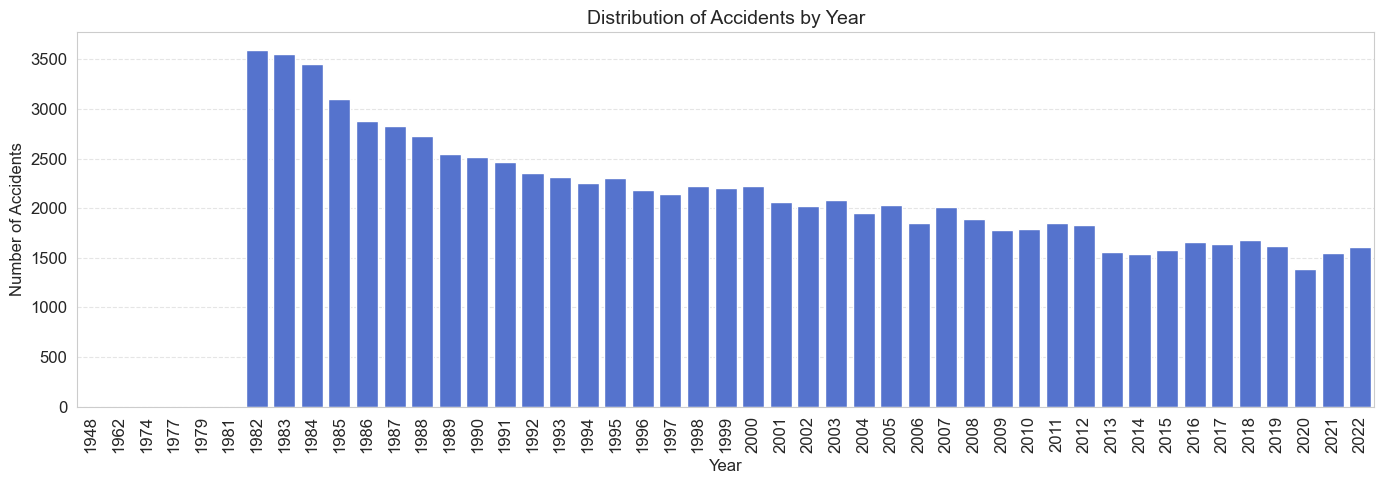

In [26]:
# Drop NA in year just for plotting
year_counts = df['Year'].dropna().value_counts().sort_index()

plt.figure(figsize=(14, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, color='royalblue')
plt.title('Distribution of Accidents by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

6.1.2 — Distribution of Total Fatalities

We're plotting how many fatalities each accident had.

To see if most crashes are minor... or deadly. Are 1–2 deaths normal? Or are there huge tragic ones?

If we skip:
We’ll treat all crashes the same — which is not smart. Some were minor, others were major disasters. This helps us separate the two.

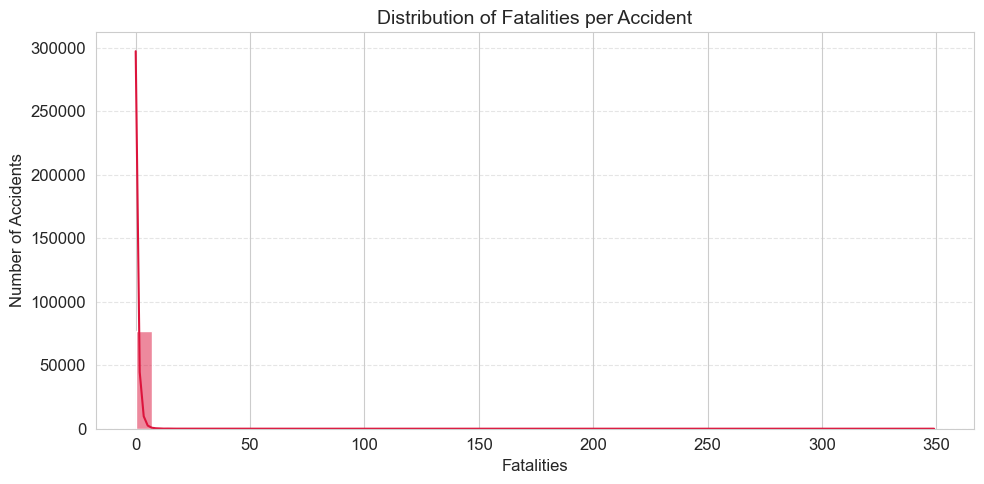

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total.Fatal.Injuries'].dropna(), bins=50, kde=True, color='crimson')
plt.title('Distribution of Fatalities per Accident', fontsize=14)
plt.xlabel('Fatalities')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


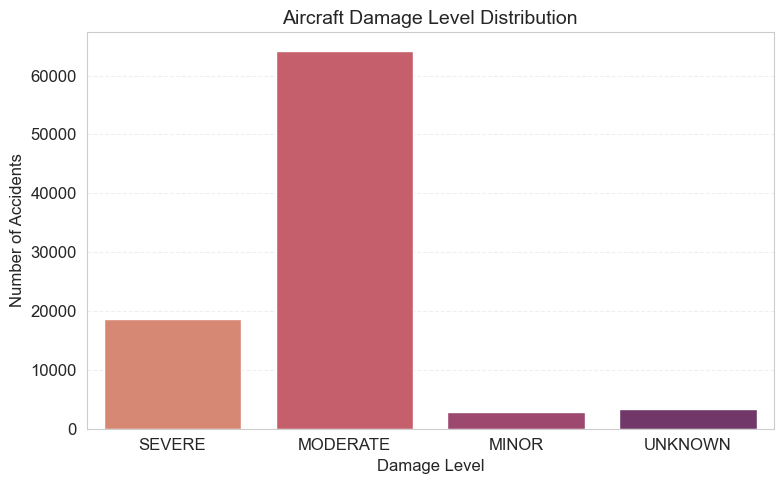

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Damage.Level', order=['SEVERE', 'MODERATE', 'MINOR', 'UNKNOWN'], palette='flare')
plt.title('Aircraft Damage Level Distribution', fontsize=14)
plt.xlabel('Damage Level')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


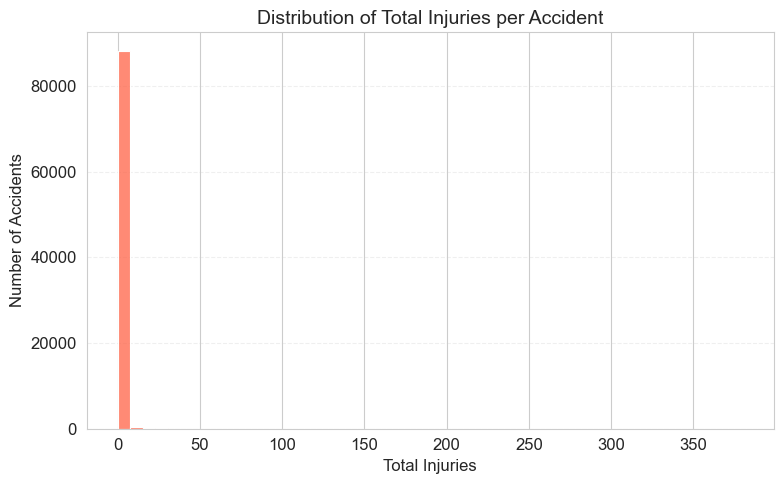

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total.Injuries', bins=50, color='tomato')
plt.title('Distribution of Total Injuries per Accident', fontsize=14)
plt.xlabel('Total Injuries')
plt.ylabel('Number of Accidents')
plt.yscale('linear')  # or 'log' if skewed
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


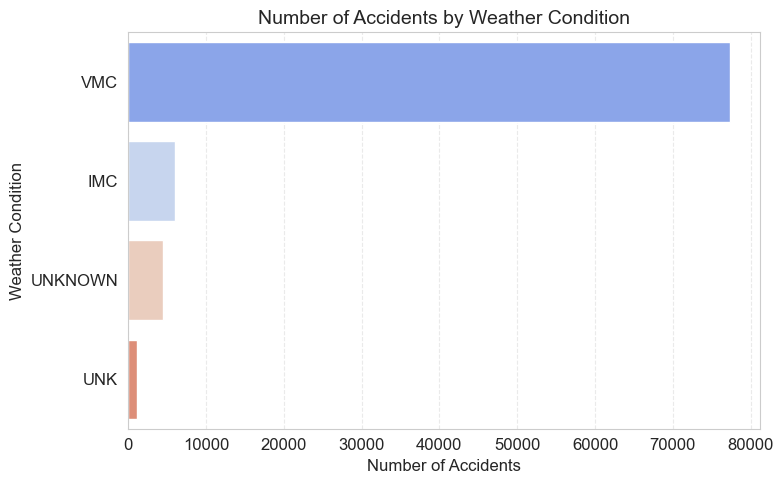

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Weather.Condition', order=df['Weather.Condition'].value_counts().index, palette='coolwarm')
plt.title('Number of Accidents by Weather Condition', fontsize=14)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


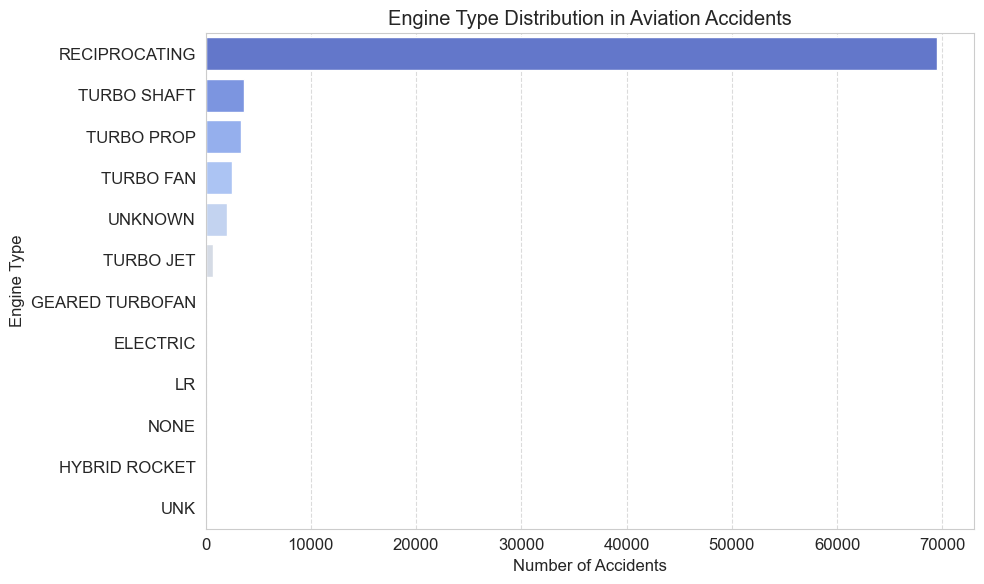

In [31]:
# Countplot for Engine Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Engine.Type', order=df['Engine.Type'].value_counts().index, palette='coolwarm')

plt.title('Engine Type Distribution in Aviation Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


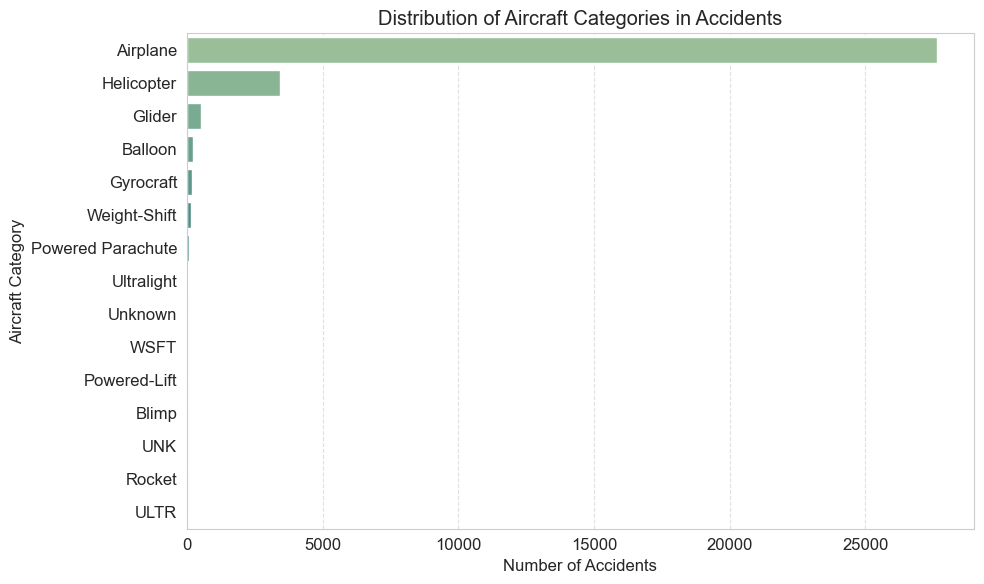

In [32]:
# Countplot for Aircraft Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Aircraft.Category', order=df['Aircraft.Category'].value_counts().index, palette='crest')

plt.title('Distribution of Aircraft Categories in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


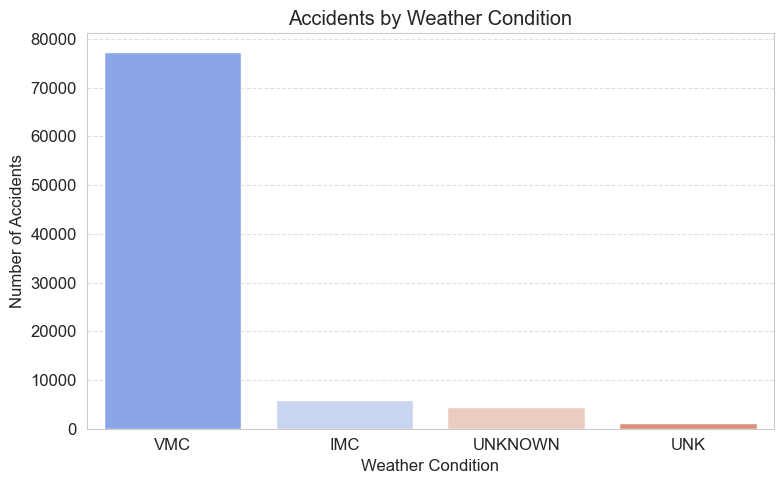

In [33]:
# Clean formatting: uppercase for consistency
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

# Plot weather condition distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather.Condition', order=df['Weather.Condition'].value_counts().index, palette='coolwarm')

plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


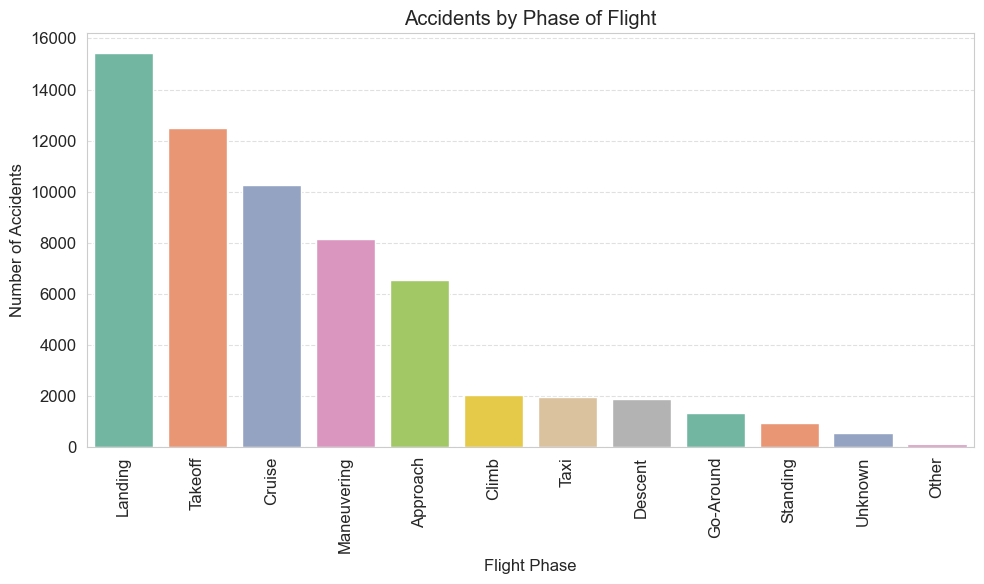

In [34]:
# Clean up phase text
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.title()

# Plot distribution of flight phases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Broad.phase.of.flight', 
              order=df['Broad.phase.of.flight'].value_counts().index,
              palette='Set2')

plt.title('Accidents by Phase of Flight')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


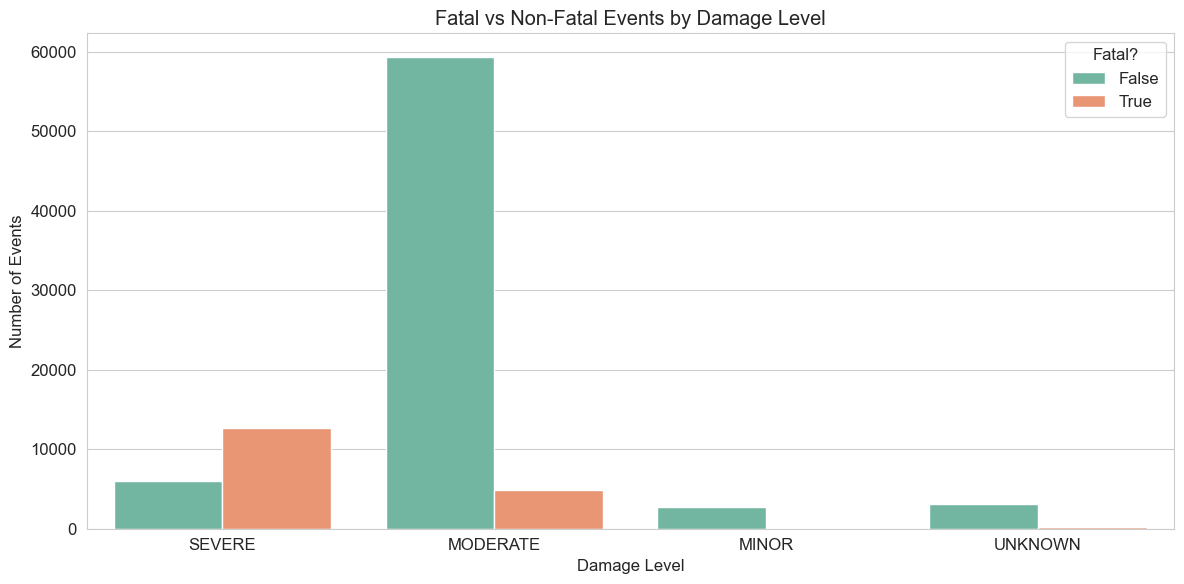

In [35]:
# Countplot to show fatalities by damage level
sns.countplot(data=df, x='Damage.Level', hue='Is.Fatal', palette='Set2')

plt.title('Fatal vs Non-Fatal Events by Damage Level')
plt.xlabel('Damage Level')
plt.ylabel('Number of Events')
plt.legend(title='Fatal?')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


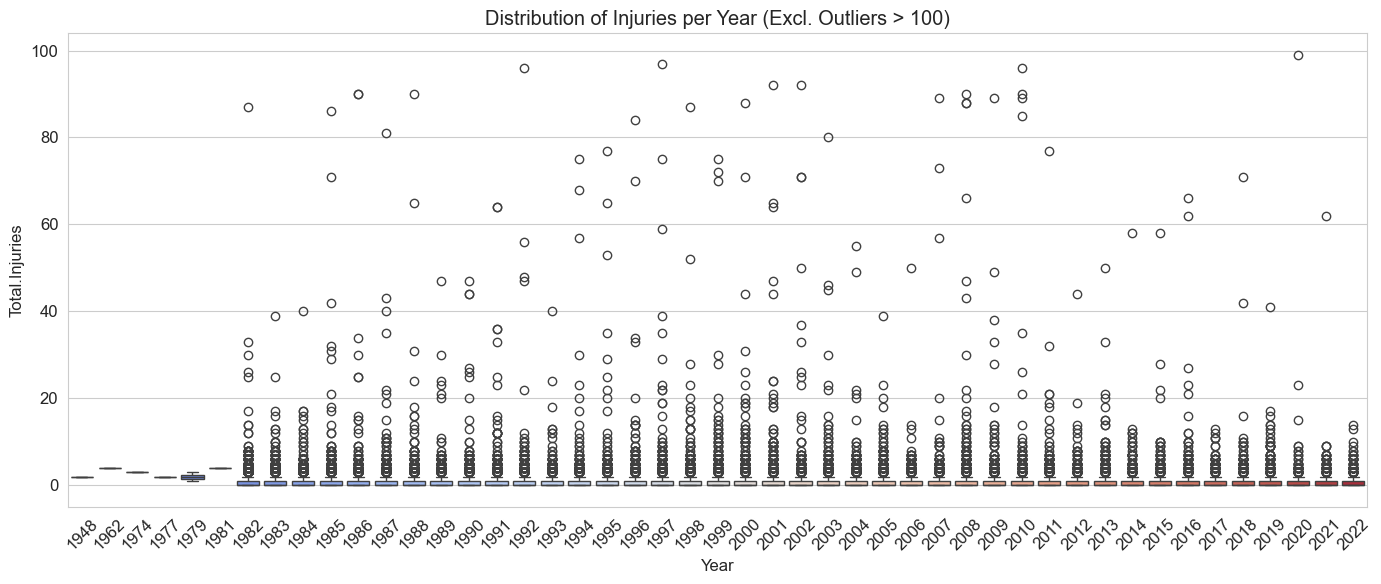

In [36]:
# Filter out unrealistic values
injury_df = df[df['Total.Injuries'] < 100]

# Boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=injury_df, x='Year', y='Total.Injuries', palette='coolwarm')

plt.title('Distribution of Injuries per Year (Excl. Outliers > 100)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


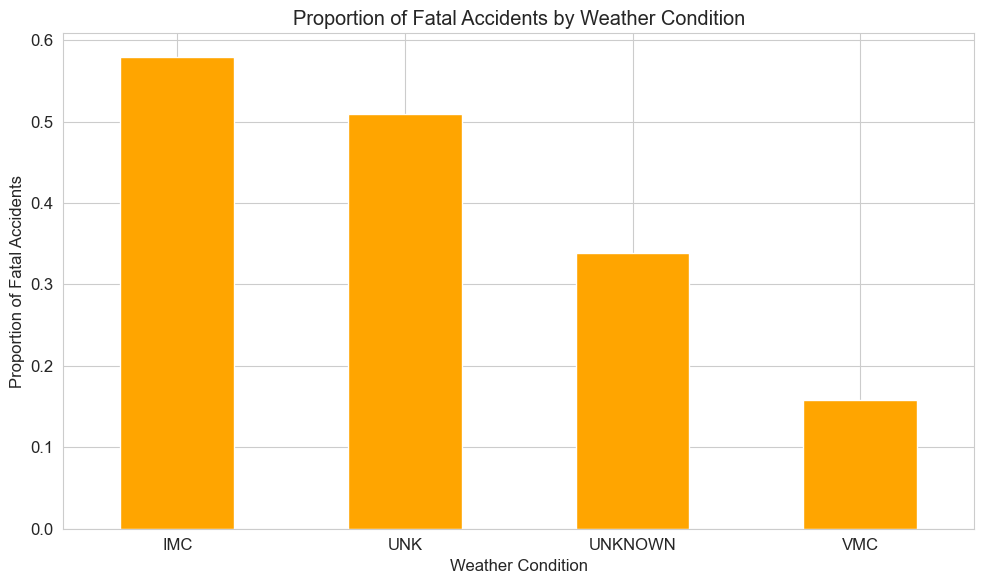

In [37]:
# Plot % of fatal accidents under each weather condition
weather_fatal = df.groupby('Weather.Condition')['Is.Fatal'].mean().sort_values(ascending=False)

weather_fatal.plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Proportion of Fatal Accidents by Weather Condition')
plt.ylabel('Proportion of Fatal Accidents')
plt.xlabel('Weather Condition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


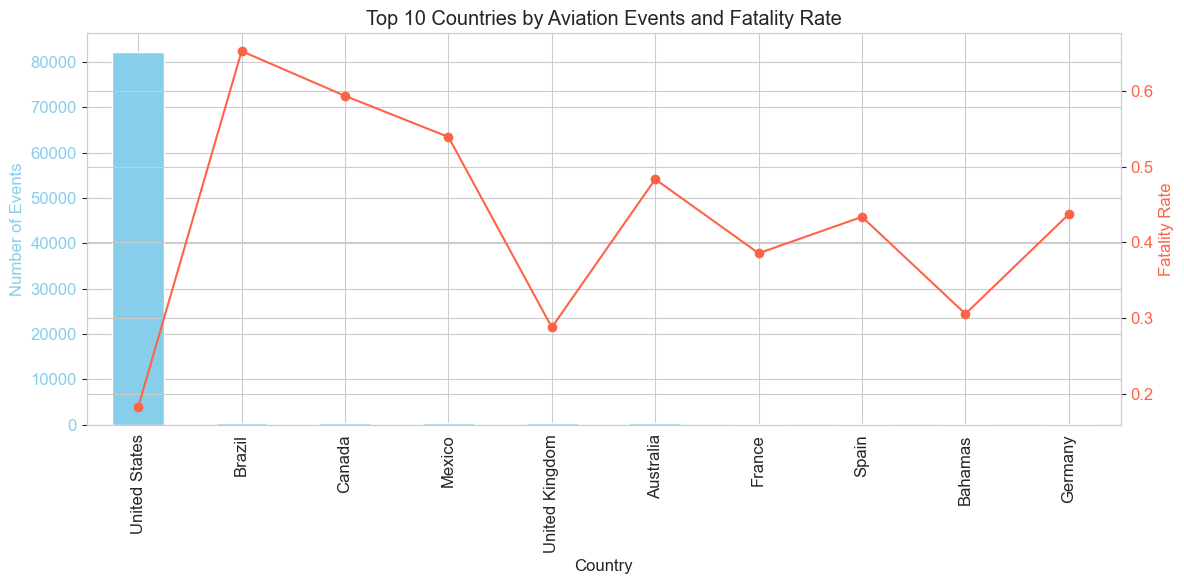

In [38]:
# Group by Country
country_stats = df.groupby('Country').agg({
    'Event.Id': 'count',
    'Is.Fatal': 'mean'
}).rename(columns={'Event.Id': 'Event.Count', 'Is.Fatal': 'Fatal.Rate'})

# Top 10 countries by number of events
top_10 = country_stats.sort_values(by='Event.Count', ascending=False).head(10)

# Bar plot (double axis)
fig, ax1 = plt.subplots(figsize=(12,6))

color1 = 'skyblue'
color2 = 'tomato'

top_10['Event.Count'].plot(kind='bar', ax=ax1, color=color1)
ax1.set_ylabel('Number of Events', color=color1)
ax1.set_title('Top 10 Countries by Aviation Events and Fatality Rate')
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis
ax2 = ax1.twinx()
top_10['Fatal.Rate'].plot(kind='line', ax=ax2, color=color2, marker='o')
ax2.set_ylabel('Fatality Rate', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


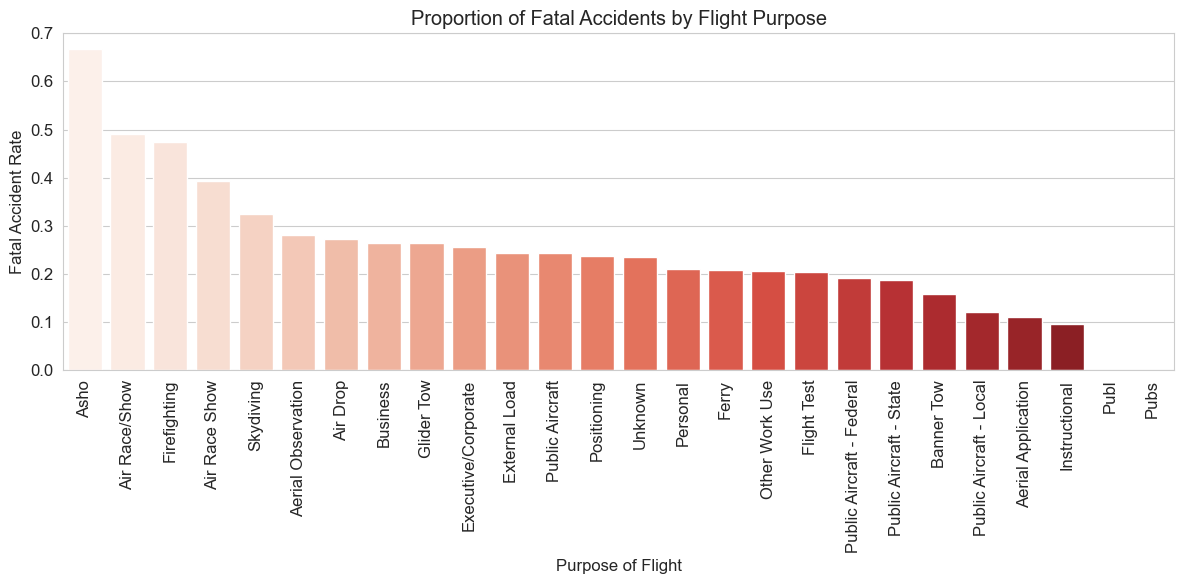

In [39]:
# Clean purpose column just in case
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.strip().str.title()

# Group: Fatality rate per flight purpose
purpose_fatality = df.groupby('Purpose.of.flight')['Is.Fatal'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=purpose_fatality.index, y=purpose_fatality.values, palette='Reds')

plt.title('Proportion of Fatal Accidents by Flight Purpose')
plt.ylabel('Fatal Accident Rate')
plt.xlabel('Purpose of Flight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


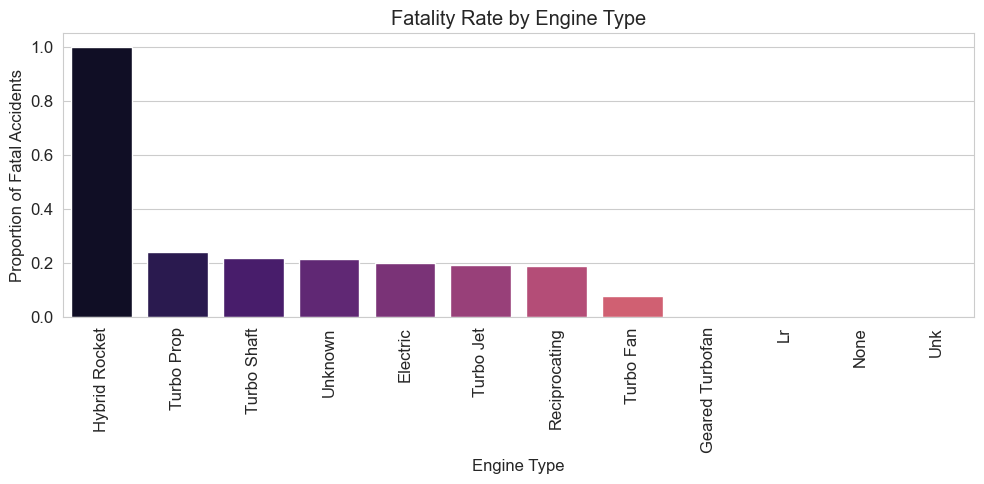

In [40]:
# Clean text for consistency
df['Engine.Type'] = df['Engine.Type'].str.strip().str.title()

# Calculate fatality rate by engine type
engine_fatality = df.groupby('Engine.Type')['Is.Fatal'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=engine_fatality.index, y=engine_fatality.values, palette='magma')

plt.title('Fatality Rate by Engine Type')
plt.ylabel('Proportion of Fatal Accidents')
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


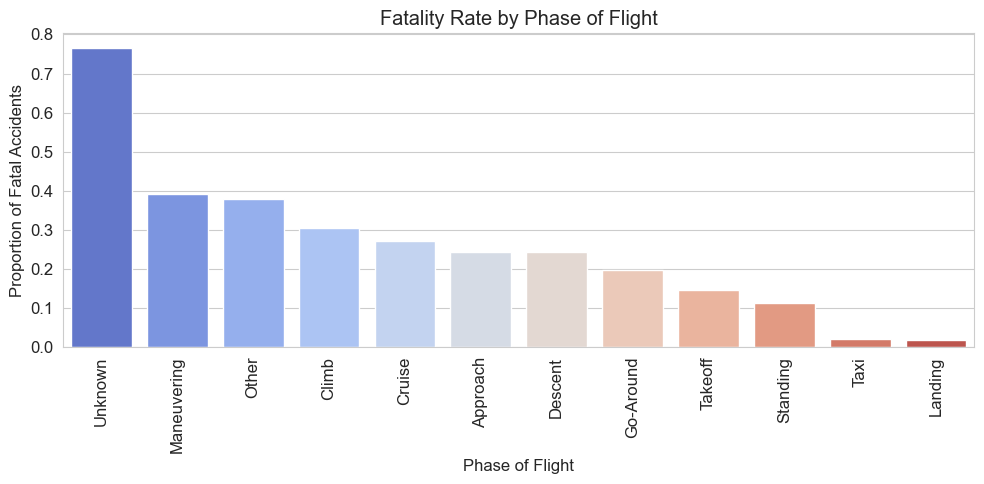

In [41]:
# Clean the column
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.strip().str.title()

# Group by flight phase
phase_fatality = df.groupby('Broad.phase.of.flight')['Is.Fatal'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=phase_fatality.index, y=phase_fatality.values, palette='coolwarm')

plt.title('Fatality Rate by Phase of Flight')
plt.ylabel('Proportion of Fatal Accidents')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


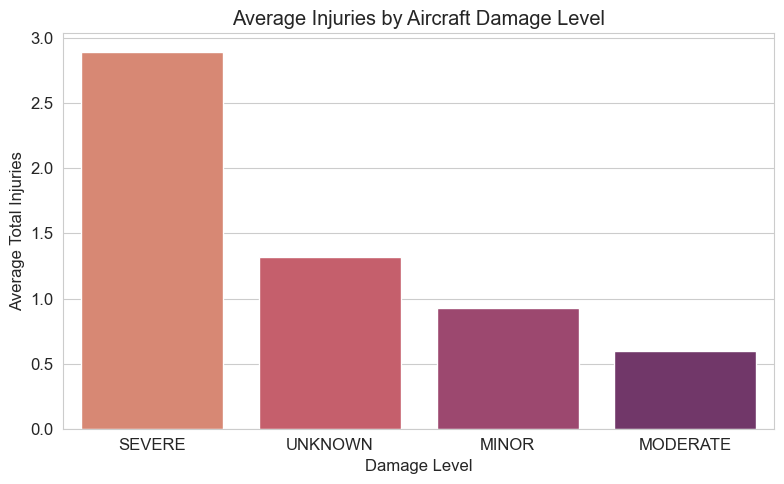

In [42]:
# Ensure total injuries is numeric
df['Total.Injuries'] = pd.to_numeric(df['Total.Injuries'], errors='coerce')

# Group and calculate average injuries by damage level
damage_injury_avg = df.groupby('Damage.Level')['Total.Injuries'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=damage_injury_avg.index, y=damage_injury_avg.values, palette='flare')

plt.title('Average Injuries by Aircraft Damage Level')
plt.ylabel('Average Total Injuries')
plt.xlabel('Damage Level')
plt.tight_layout()
plt.show()


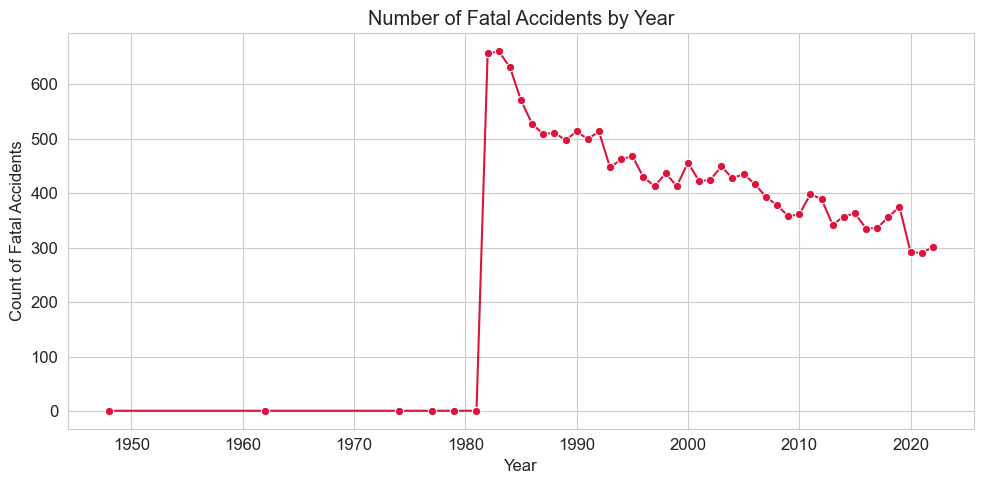

In [43]:
# Group by year and count fatal accidents
yearly_fatal = df[df['Is.Fatal'] == True].groupby('Year').size()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_fatal.index, y=yearly_fatal.values, marker='o', color='crimson')

plt.title('Number of Fatal Accidents by Year')
plt.ylabel('Count of Fatal Accidents')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


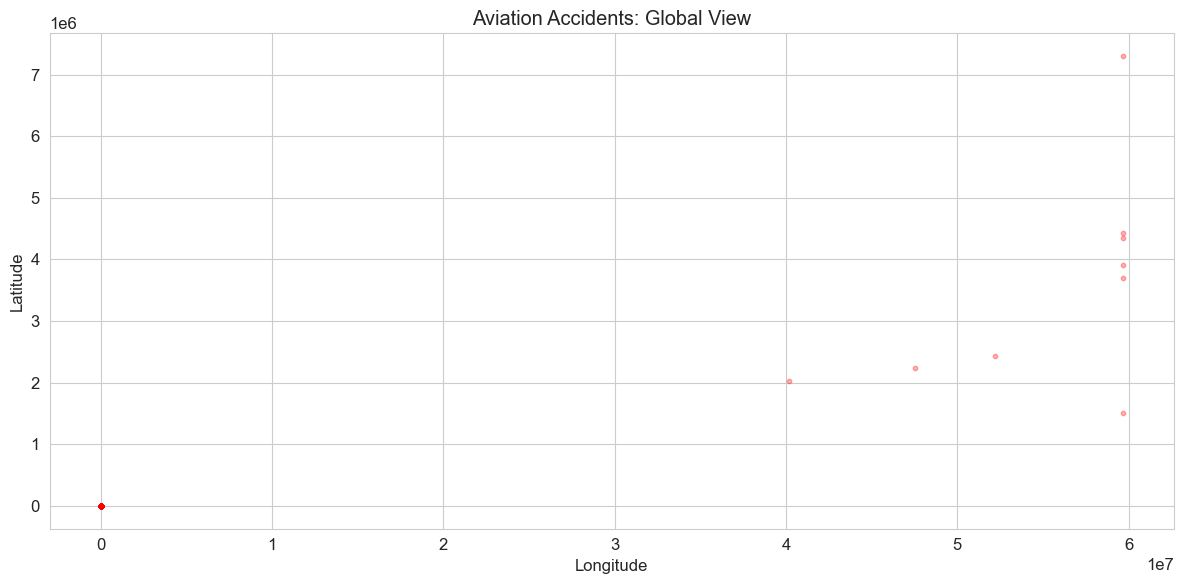

In [44]:
# Filter out rows without coordinates
geo_df = df[df['Has.Coordinates'] == True]

plt.figure(figsize=(12,6))
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], 
            s=10, alpha=0.3, c='red')

plt.title('Aviation Accidents: Global View')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


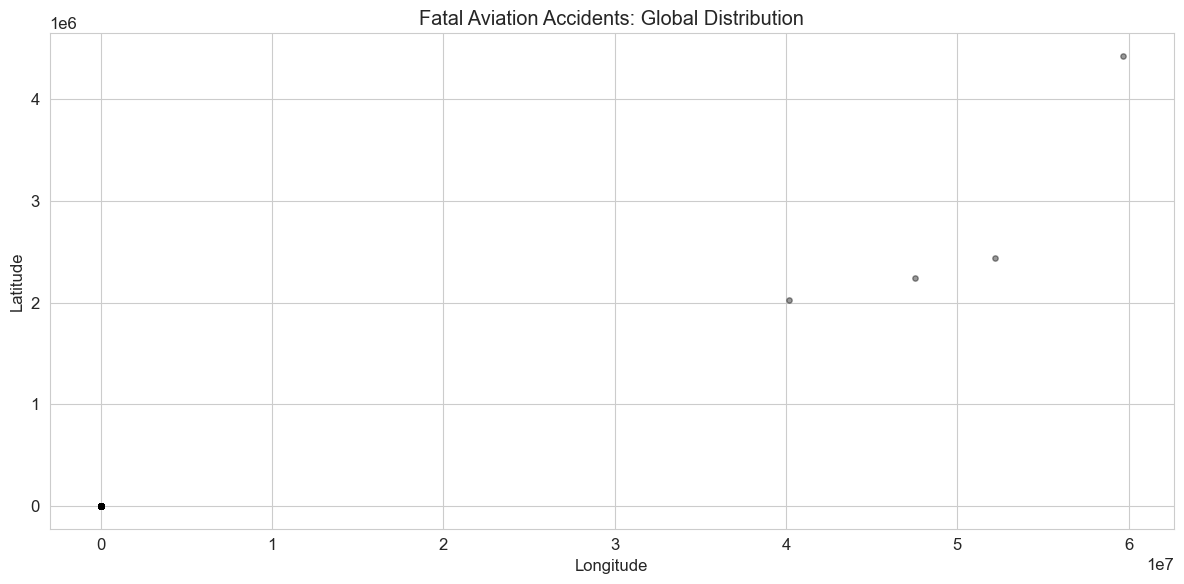

In [45]:
# Subset only fatal crashes with coordinates
fatal_df = df[(df['Has.Coordinates']) & (df['Is.Fatal'] == True)]

plt.figure(figsize=(12,6))
plt.scatter(fatal_df['Longitude'], fatal_df['Latitude'], 
            s=15, alpha=0.4, color='black')

plt.title('Fatal Aviation Accidents: Global Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Only keep rows with valid latitude and longitude
map_df = df[df['Has.Coordinates'] == True].copy()

# Optional: Limit to recent years for clarity
map_df = map_df[map_df['Year'] >= 2000]


In [47]:
import plotly.express as px

fig = px.scatter_geo(
    map_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Location',
    hover_data={
        'Year': True,
        'Total.Injuries': True,
        'Total.Fatal.Injuries': True,
        'Aircraft.damage': True,
        'Engine.Type': True
    },
    color='Is.Fatal',
    color_discrete_map={True: 'crimson', False: 'dodgerblue'},
    title='Global Aviation Accidents (2000–Present)',
    opacity=0.6,
    size='Total.Injuries',
    size_max=10,
    projection='natural earth'
)

fig.update_geos(showland=True, landcolor="rgb(217, 217, 217)")
fig.update_layout(height=600, margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [48]:
# Final null check
display(df.isnull().sum().sort_values(ascending=False))



Longitude                 76915
Latitude                  76903
Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Registration.Number        1382
Country                     226
Amateur.Built               102
Location                     52
Is.Fatal                      0
Total.Injuries                0
Event.Month                   0
Make_Grouped                  0
Damage.Level                  0
Day                           0
Event.Year                    0
Month                         0
Year                          0
Event.Id

In [49]:
# Check for invalid numeric values
display(df.describe())

Event.Date      Latitude     Longitude  \
count                          88889  1.198600e+04  1.197400e+04   
mean   1999-09-17 17:13:39.354475904  3.994505e+03  4.645638e+04   
min              1948-10-24 00:00:00 -7.801695e+01 -1.742967e+02   
25%              1989-01-15 00:00:00  3.344222e+01 -1.162256e+02   
50%              1998-07-18 00:00:00  3.816736e+01 -9.547861e+01   
75%              2009-07-01 00:00:00  4.256153e+01 -8.201972e+01   
max              2022-12-29 00:00:00  7.302524e+06  5.965231e+07   
std                              NaN  1.361132e+05  1.621415e+06   

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   
std             0.446510              5.485960                1.544084   

       Total.Minor.Injuries  Total.Uninjured    Event.Year   Event.Month  \
count          76956.000000     82977.000000  88889.000000  88889.000000   
mean               0.357061         5.325440   1999.206662      6.591221   
min                0.000000         0.000000   1948.000000      1.000000   
25%                0.000000         0.000000   1989.000000      4.000000   
50%                0.000000         1.000000   1998.000000      7.000000   
75%                0.000000         2.000000   2009.000000      9.000000   
max              380.000000       699.000000   2022.000000     12.000000   
std                2.235625        27.913634     11.888226      3.062868   

               Year         Month           Day  Total.Injuries  
count  88889.000000  88889.000000  88889.000000    88889.000000  
mean    1999.206662      6.591221     15.729089        1.114379  
min     1948.000000      1.000000      1.000000        0.000000  
25%     1989.000000      4.000000      8.000000        0.000000  
50%     1998.000000      7.000000     16.000000        0.000000  
75%     2009.000000      9.000000     23.000000        1.000000  
max     2022.000000     12.000000     31.000000      380.000000  
std       11.888226      3.062868      8.837165        6.027319

In [50]:
for col in ['Damage.Level', 'Is.Fatal', 'Engine.Type', 'Aircraft.damage']:
    print(f"{col}: {df[col].unique()}")

Damage.Level: ['SEVERE' 'MODERATE' 'MINOR' 'UNKNOWN']
Is.Fatal: [ True False]
Engine.Type: ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'Lr' 'None'
 'Unk']
Aircraft.damage: ['DESTROYED' 'SUBSTANTIAL' 'MINOR' 'NAN' 'UNKNOWN']


In [51]:
# Export clean version to CSV
df.to_csv('aviation_cleaned.csv', index=False)
